In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Import data

In [2]:
data_train = pd.read_csv("fashion-mnist_train.csv")
data_test = pd.read_csv("fashion-mnist_test.csv")

## Assign X and y

In [3]:
x_train = np.array(data_train.iloc[:,1:])
y_train = np.array(data_train.iloc[:,0])

## OneHotEncode

In [4]:
y_train = to_categorical(y_train)

## Split into train, validation set

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [6]:
x_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

## Reshape dataset and normalize

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype("float32")
x_train /= 255

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype("float32")
x_test /= 255

x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_val = x_val.astype("float32")
x_val /= 255

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Create model

In [9]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = (28,28,1)))

In [10]:
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(Dropout(0.25))

In [11]:
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [13]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [14]:
network = model.fit(x_train, y_train, epochs = 20, batch_size = 1024, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 28s 582us/step - loss: 1.1618 - accuracy: 0.5719 - val_loss: 0.7518 - val_accuracy: 0.6943
Epoch 2/20
48000/48000 [==============================] - 28s 576us/step - loss: 0.6745 - accuracy: 0.7422 - val_loss: 0.6198 - val_accuracy: 0.7596
Epoch 3/20
48000/48000 [==============================] - 28s 584us/step - loss: 0.5772 - accuracy: 0.7815 - val_loss: 0.4980 - val_accuracy: 0.8173
Epoch 4/20
48000/48000 [==============================] - 28s 580us/step - loss: 0.5127 - accuracy: 0.8061 - val_loss: 0.4850 - val_accuracy: 0.8238
Epoch 5/20
48000/48000 [==============================] - 28s 579us/step - loss: 0.4686 - accuracy: 0.8249 - val_loss: 0.3992 - val_accuracy: 0.8583
Epoch 6/20
48000/48000 [==============================] - 28s 582us/step - loss: 0.4370 - accuracy: 0.8370 - val_loss: 0.3786 - val_accuracy: 0.8638
Epoch 7/20
48000/48000 [==============================] 

In [15]:
model.evaluate(x_test, y_test, verbose=0)

[0.24868908247947694, 0.9072999954223633]

In [16]:
from matplotlib import pyplot as plt

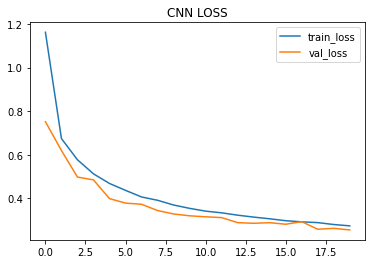

In [17]:
plt.plot(network.history["loss"], label="train_loss")
plt.plot(network.history["val_loss"], label="val_loss")
plt.legend()
plt.title("CNN LOSS")
plt.show()

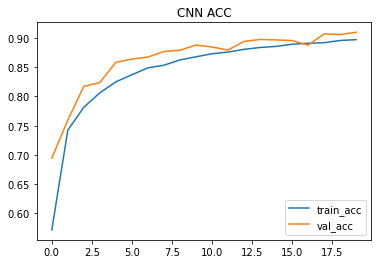

In [18]:
plt.plot(network.history["accuracy"], label="train_acc")
plt.plot(network.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("CNN ACC")
plt.show()

I obeserved there is no overfitting. 

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
confusion_matrix(data_test["label"].values,model.predict_classes(x_test))

array([[900,   3,  12,  10,   2,   0,  66,   0,   7,   0],
       [  1, 985,   2,   8,   1,   1,   2,   0,   0,   0],
       [ 18,   3, 846,   9,  69,   0,  51,   0,   4,   0],
       [ 29,   6,   8, 906,  35,   0,  16,   0,   0,   0],
       [  0,   3,  39,  15, 889,   0,  53,   0,   1,   0],
       [  1,   0,   0,   0,   0, 964,   0,  26,   1,   8],
       [164,   2,  69,  14,  71,   0, 671,   0,   9,   0],
       [  0,   0,   0,   0,   0,   4,   0, 955,   0,  41],
       [  2,   3,   3,   0,   2,   1,   3,   1, 984,   1],
       [  0,   0,   0,   0,   0,   1,   0,  25,   1, 973]], dtype=int64)

In [21]:
accuracy_score(data_test["label"].values,model.predict_classes(x_test))

0.9073